In [203]:
#載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [335]:
#使用資料夾內鐵達尼號的資料集，練習邏輯迴歸的處理邏輯
train = pd.read_csv('data/titanic_data.csv')
train.head(10)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [205]:
train=pd.read_csv("/Users/zhuzhiwen/Downloads/Unit05/data/titanic_data.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


<Axes: >

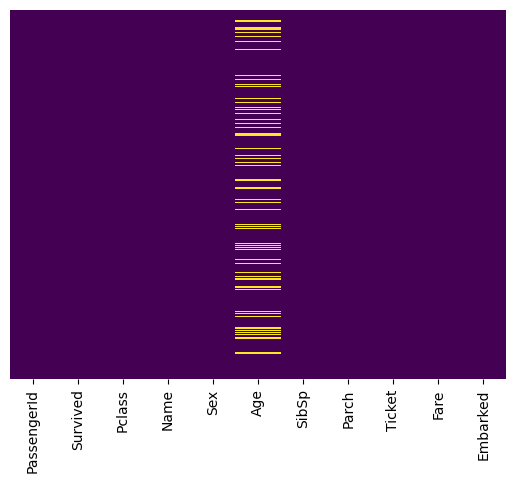

In [245]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<Axes: >

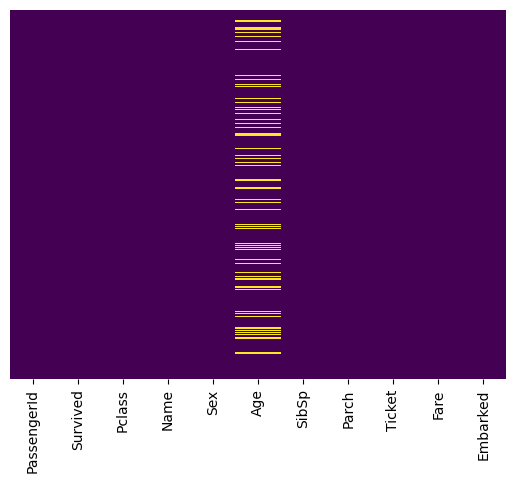

In [207]:
#探索資料
#用heatmap(.isnull()來找出缺失的資料在哪些欄位。Age似乎約有五分之一的資料缺失，可用合理資料補充。)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

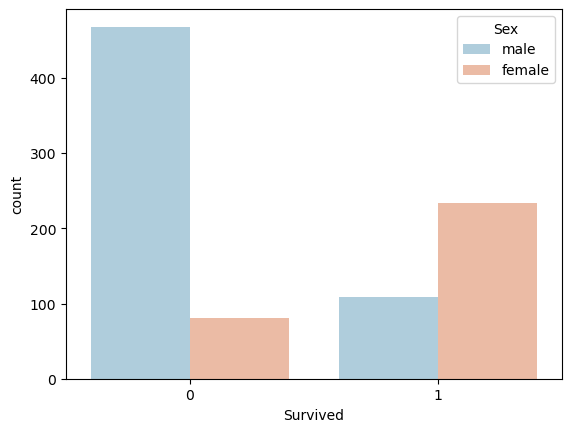

In [246]:
sns.countplot(x="Survived",hue="Sex",data=train,palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

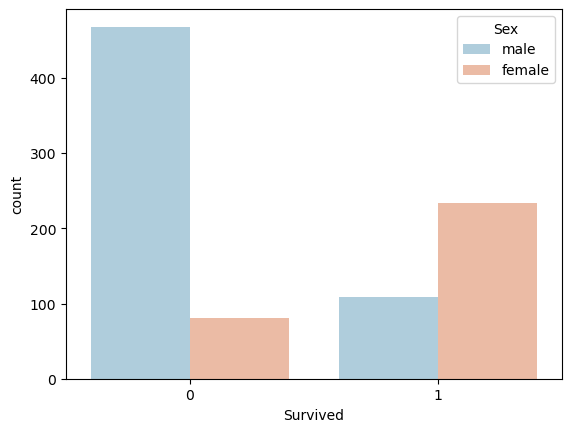

In [209]:
#用countplot來看性別是否影響最後存活。女性存活比例比男性高。
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

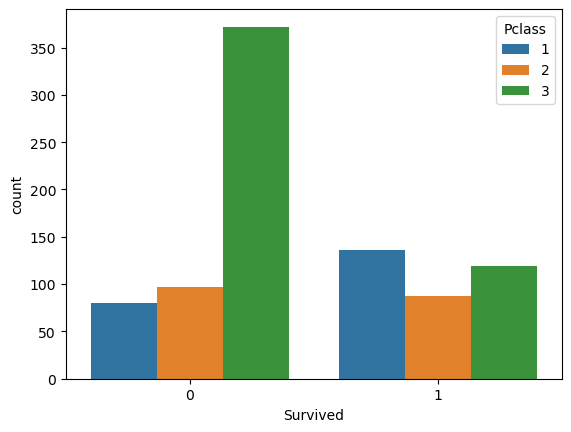

In [210]:
#艙等是否也影響存活?
sns.countplot(x='Survived',hue='Pclass',data=train)

<Axes: xlabel='Survived', ylabel='count'>

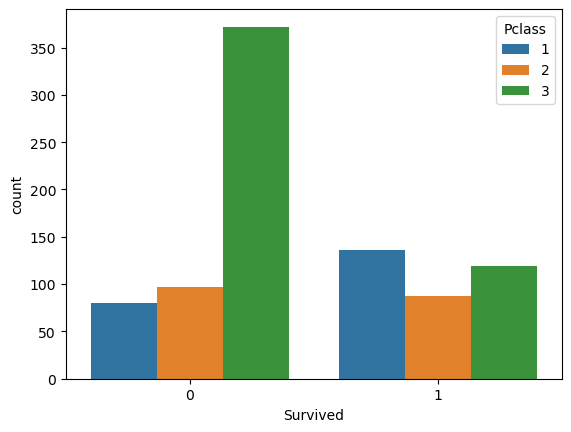

In [211]:
sns.countplot(x='Survived',hue="Pclass",data=train)

/var/folders/kr/yp9msdks48d7x19pn9l_d_pc0000gn/T/ipykernel_25040/1979882734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"].dropna(),kde=True,bins=30)


<Axes: xlabel='Age', ylabel='Density'>

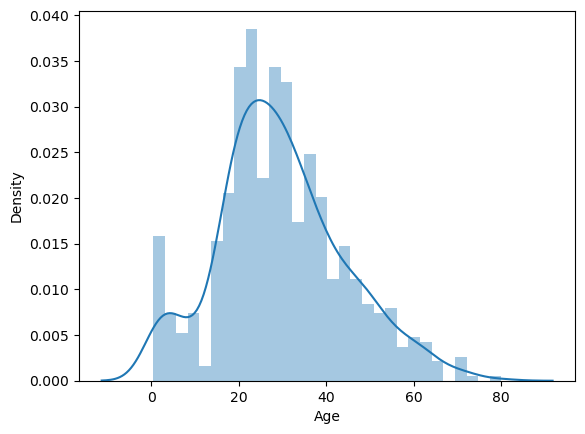

In [336]:
sns.distplot(train["Age"].dropna(),kde=True,bins=30)

/var/folders/kr/yp9msdks48d7x19pn9l_d_pc0000gn/T/ipykernel_25040/3771514646.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=30)


<Axes: xlabel='Age'>

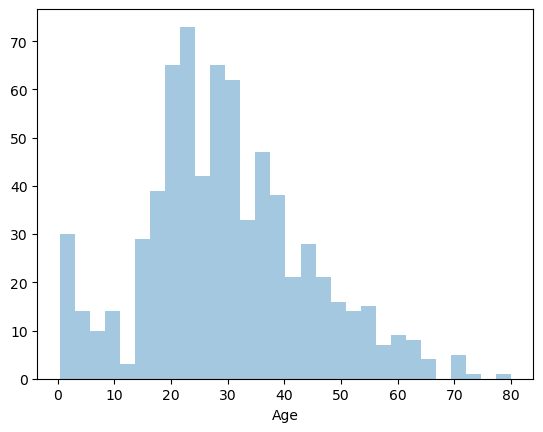

In [213]:
#用直方圖看年齡分佈。缺失資料在此不計。
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [337]:
train['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

<Axes: xlabel='SibSp', ylabel='count'>

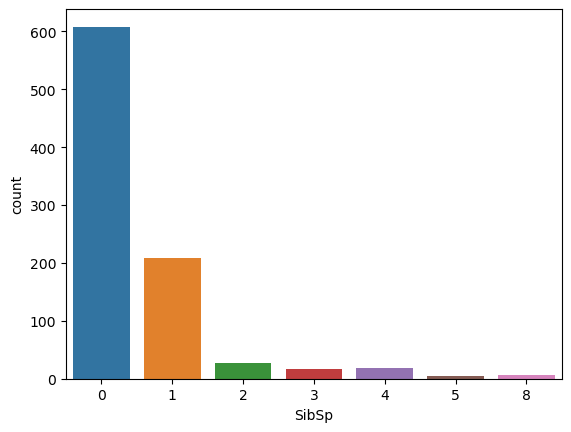

In [214]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='SibSp', ylabel='count'>

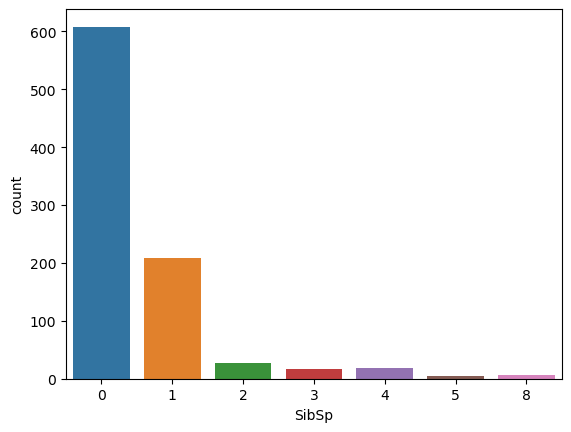

In [215]:
#SibSp代表兄弟姐妹或眷屬人數
sns.countplot(x='SibSp',data=train)

<Axes: >

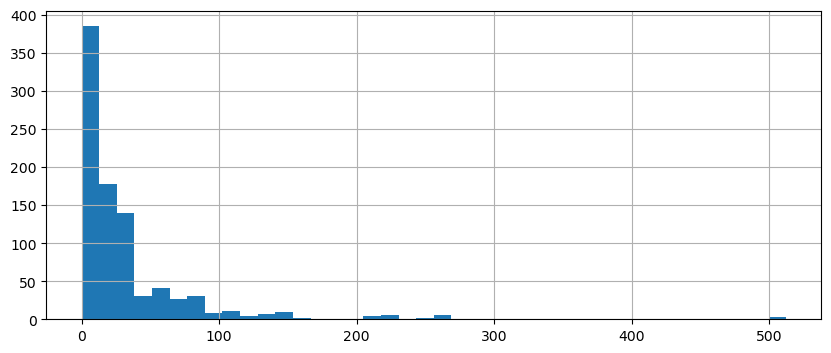

In [216]:
#用直方圖看票價分佈
train['Fare'].hist(bins=40,figsize=(10,4))

<Axes: >

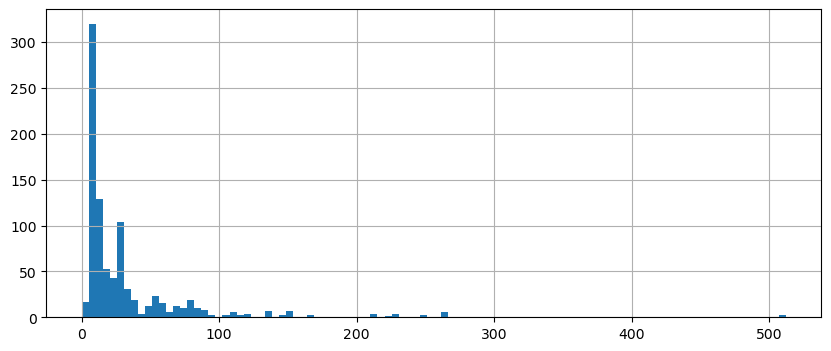

In [217]:
train["Fare"].hist(bins=100,figsize=(10,4))

<Axes: xlabel='Pclass', ylabel='Age'>

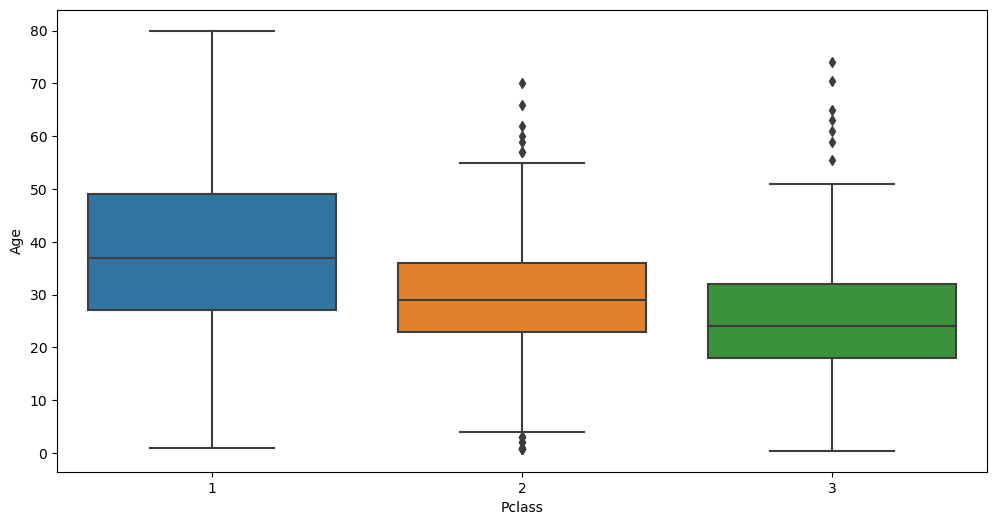

In [218]:
#資料清理
#剛有看到年齡資料約有五分之一缺失，一種做法是棄之不用，一種可以考慮把年齡平均放進去。
#使用盒鬚圖來看年齡和艙等的分佈。看起來頭等艙年齡較高，隨之降低。
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [294]:
#把艙等平均年齡填入缺失的資料中
#艙等1平均年齡是37，艙等2平均年齡是29，艙等3平均年齡是24
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [295]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [338]:
def impute_age(cols):
   
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
 
train['Age']=train[["Age","Pclass"]].apply(impute_age,axis=1)       
    


In [221]:
train[850:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,S
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,C
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,C


In [222]:
train["Name"]['Partner, Mr. Austen']

KeyError: 'Partner, Mr. Austen'

In [ ]:
train[["Age","Pclass","Sex"]]

,Age,Pclass,Sex
0,22.0,3,male
1,38.0,1,female
2,26.0,3,female
3,35.0,1,female
4,35.0,3,male
...,...,...,...
886,27.0,2,male
887,19.0,1,female
888,24.0,3,female
889,26.0,1,male


cols[0]

<Axes: >

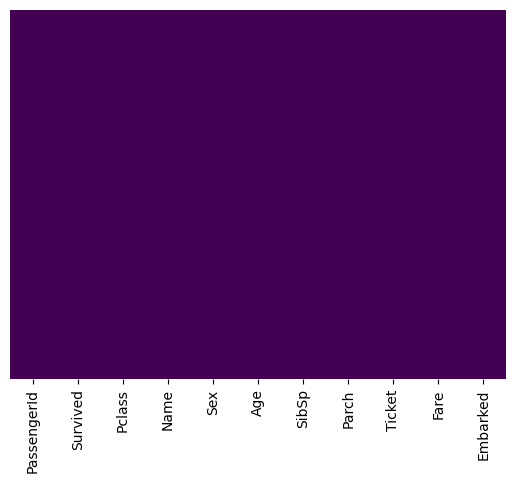

In [249]:
#用heatmap查看年齡是否還有缺失資料
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

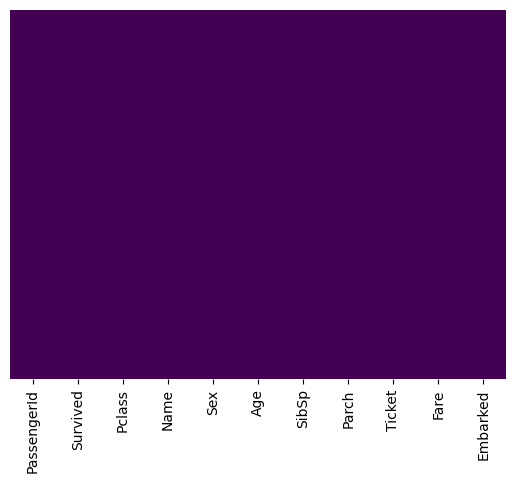

In [250]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
train.dropna(inplace=True)#inplace： False: 返回新的數據集（默認） True: 在原數據集上操作
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,29,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,37,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,37,0,0,111369,30.0000,C


In [ ]:
train.dropna(inplace=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
#虛擬變數範例
#使用pandas(d.get_dummies)將性別從類別資料轉為數值變數。
sex = pd.get_dummies(train['Sex'],drop_first=True)
#請將drop_first=True，如果為True會刪除第一個類別值。
#本來若有k個level，drop_first=True會只剩下k-1個level，降低共線性的可能
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
sex=pd.get_dummies(train["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [226]:
#使用pandas將上船的港口從類別資料改換為數值變數(drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [227]:
embark=pd.get_dummies(train["Embarked"],drop_first=True)
embark.head(10)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [251]:
train=pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,0,1


In [339]:
#將性別及上船港口的數值變數和原始的data結合
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,0,1


In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [340]:
#將原始的性別、登船港口、票號、姓名欄位棄用
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0,1
1,2,1,1,38.0,1,0,71.2833,0.0,0,0
2,3,1,3,26.0,0,0,7.9250,0.0,0,1
3,4,1,1,35.0,1,0,53.1000,0.0,0,1
4,5,0,3,35.0,0,0,8.0500,1.0,0,1


In [342]:
train.drop("PassengerId",axis=1,inplace=True)
train.head()

KeyError: "['PassengerId'] not found in axis"

In [343]:
#因為PassengerId在此也只是排序，因此也棄用
train.drop('male',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,0,3,35.0,0,0,8.0500,0,1


In [299]:
#建立feature資料集(選取survived以外所有欄位)與target資料集(survived)
X = train.drop('Survived',axis=1)
y = train['Survived']


X

In [344]:
X=train.drop("Survived",axis=1)
y=train["Survived"]

In [ ]:
X.dropna(inplace=True)
y.dropna(inplace=True)


In [262]:
X[600]

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,38.0,1,0,71.2833,0.0,0,0
2,3,26.0,0,0,7.9250,0.0,0,1
3,1,35.0,1,0,53.1000,0.0,0,1
4,3,35.0,0,0,8.0500,1.0,0,1
5,3,24.0,0,0,8.4583,1.0,1,0
...,...,...,...,...,...,...,...,...
595,3,36.0,1,1,24.1500,1.0,0,1
596,2,29.0,0,0,33.0000,0.0,0,1
597,3,49.0,0,0,0.0000,1.0,0,1
598,3,24.0,0,0,7.2250,1.0,0,0


In [345]:
#載入訓練組及測試組分組套件
from sklearn.model_selection import train_test_split

In [346]:
#設定隨機種子(random_state)為101，測試組比例佔30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)

In [348]:
#載入邏輯回歸
from sklearn.linear_model import LogisticRegression

In [272]:
X_train[:50]

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
520,1,30.0,0,0,93.5000,0.0,0,1
510,3,29.0,0,0,7.7500,1.0,1,0
446,2,13.0,0,1,19.5000,0.0,0,1
2,3,26.0,0,0,7.9250,0.0,0,1
691,3,4.0,0,1,13.4167,0.0,0,0
195,1,58.0,0,0,146.5208,0.0,0,0
790,3,24.0,0,0,7.7500,1.0,1,0
257,1,30.0,0,0,86.5000,0.0,0,1
39,3,14.0,1,0,11.2417,0.0,0,0
234,2,24.0,0,0,10.5000,1.0,0,1


In [ ]:
y_train.drop(train.tail(120).index,inplace=True)

KeyError: '[771, 777, 781, 784, 786, 788, 789, 791, 793, 798, 799, 804, 808, 817, 820, 825, 827, 828, 829, 834, 837, 845, 847, 856, 857, 864, 866, 867, 869, 873, 879, 881, 888, 889] not found in axis'

In [349]:
#建立訓練組邏輯迴歸模型
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [426]:
logmodel.score(X_test,y_test)

0.6902985074626866

In [427]:
X.isnull().any().any()

False

In [332]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
train['Partner, Mr. Austen']

KeyError: 'Partner, Mr. Austen'

In [412]:
#使用模型進行測試集資料的預測
predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(X_train)
predictions 

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0])

In [413]:
y_test

331    0
700    1
748    0
751    1
481    0
      ..
388    0
416    1
407    1
482    0
829    1
Name: Survived, Length: 268, dtype: int64

In [352]:
#ground truth
print(y_test.values)
print(y_train.values)

[0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 1 1 0 1 1 0 1]
[1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 

In [ ]:
print(y_test.values)
print(y_train.values)

[0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 1 1 0 1 1 0 1]
[1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 

#### 計算accuracy及結果顯示
accuracy<br>
error_index #錯誤答案是哪幾筆資料<br>
miss classification #錯誤答案<br>
錯誤欄位的正確之原始資料表格

In [358]:
error_index2=np.where(predictions2!=y_train.values)[0]
print('train accuracy:',1-len(error_index2)/len(X_train))
error_index=np.where(predictions!=y_test.values)[0]
print('test accuracy:',1-len(error_index)/len(X_test))

train accuracy: 0.725521669341894
test accuracy: 0.6902985074626866


In [369]:
error_index2=np.where(predictions2!=y_train.values)[0]
print('train accuracy:',1-len(error_index2)/len(X_train))
error_index=np.where(predictions!=y_test.values)[0]
print('test accuracy:',1-len(error_index)/len(X_test))

train accuracy: 0.725521669341894
test accuracy: 0.6902985074626866


In [365]:
error_index2=np.where(predictions2!=y_train.values)[0]
error_index2

array([  1,   3,   8,  13,  17,  22,  25,  28,  30,  34,  36,  40,  44,
        45,  46,  51,  56,  58,  60,  61,  68,  71,  74,  77,  84,  88,
        91,  92, 112, 116, 117, 119, 120, 122, 124, 125, 138, 154, 165,
       166, 169, 170, 176, 177, 185, 186, 188, 190, 193, 195, 198, 200,
       201, 207, 208, 210, 216, 218, 223, 224, 227, 233, 234, 237, 238,
       240, 245, 250, 260, 261, 265, 269, 271, 272, 281, 282, 283, 285,
       288, 289, 294, 295, 296, 307, 310, 312, 331, 333, 339, 342, 343,
       344, 348, 350, 352, 355, 356, 362, 364, 365, 368, 369, 377, 379,
       386, 390, 391, 394, 395, 402, 404, 405, 407, 408, 409, 410, 412,
       415, 416, 417, 418, 419, 429, 431, 432, 434, 439, 441, 442, 444,
       448, 453, 454, 458, 459, 463, 468, 479, 481, 482, 485, 487, 495,
       501, 505, 506, 511, 517, 518, 520, 528, 532, 535, 536, 538, 539,
       541, 548, 551, 555, 559, 564, 565, 566, 574, 578, 592, 600, 610,
       613, 619])

In [379]:
error_index=np.where(predictions!=y_test.values)[0]
error_index

array([  2,   3,   9,  12,  13,  14,  19,  22,  23,  30,  32,  33,  41,
        43,  52,  53,  54,  55,  56,  67,  68,  69,  71,  82,  84,  86,
        91,  93,  95,  96,  99, 101, 102, 103, 104, 105, 106, 108, 110,
       118, 119, 120, 124, 125, 127, 129, 131, 141, 144, 150, 152, 156,
       164, 165, 172, 180, 181, 192, 193, 194, 195, 198, 200, 205, 206,
       210, 219, 222, 230, 231, 233, 235, 236, 237, 238, 240, 245, 248,
       250, 260, 262, 264, 267])

In [377]:
predictions

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0])

In [380]:
y_test

331    0
700    1
748    0
751    1
481    0
      ..
388    0
416    1
407    1
482    0
829    1
Name: Survived, Length: 268, dtype: int64

In [381]:
print('error_index:',error_index)
print('miss classification :',predictions[error_index])


error_index: [  2   3   9  12  13  14  19  22  23  30  32  33  41  43  52  53  54  55
  56  67  68  69  71  82  84  86  91  93  95  96  99 101 102 103 104 105
 106 108 110 118 119 120 124 125 127 129 131 141 144 150 152 156 164 165
 172 180 181 192 193 194 195 198 200 205 206 210 219 222 230 231 233 235
 236 237 238 240 245 248 250 260 262 264 267]
miss classification : [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 0 0 1 0 0 0]


In [382]:
a=[1,2,3,4,5]
a[3]

4

In [410]:
print('error_index:',error_index)
print('miss classification :',predictions[error_index])#錯誤答案
data_index=train.iloc[error_index].index#這裡變數train是所有資料
train.iloc[data_index]#錯誤欄位的正確之原始資料

error_index: [  2   3   9  12  13  14  19  22  23  30  32  33  41  43  52  53  54  55
  56  67  68  69  71  82  84  86  91  93  95  96  99 101 102 103 104 105
 106 108 110 118 119 120 124 125 127 129 131 141 144 150 152 156 164 165
 172 180 181 192 193 194 195 198 200 205 206 210 219 222 230 231 233 235
 236 237 238 240 245 248 250 260 262 264 267]
miss classification : [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 0 0 1 0 0 0]


,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
9,1,2,14.0,1,0,30.0708,0,0
12,0,3,20.0,0,0,8.0500,0,1
13,0,3,39.0,1,5,31.2750,0,1
...,...,...,...,...,...,...,...,...
250,0,3,24.0,0,0,7.2500,0,1
260,0,3,24.0,0,0,7.7500,1,0
262,0,1,52.0,1,1,79.6500,0,1
264,0,3,24.0,0,0,7.7500,1,0


In [421]:
predictions

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0])

In [422]:
predictions[error_index]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [407]:
train.iloc[error_index]

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
9,1,2,14.0,1,0,30.0708,0,0
12,0,3,20.0,0,0,8.0500,0,1
13,0,3,39.0,1,5,31.2750,0,1
...,...,...,...,...,...,...,...,...
250,0,3,24.0,0,0,7.2500,0,1
260,0,3,24.0,0,0,7.7500,1,0
262,0,1,52.0,1,1,79.6500,0,1
264,0,3,24.0,0,0,7.7500,1,0


In [415]:
error_index=np.where(predictions!=y_test.values)[0]
error_index

array([  2,   3,   9,  12,  13,  14,  19,  22,  23,  30,  32,  33,  41,
        43,  52,  53,  54,  55,  56,  67,  68,  69,  71,  82,  84,  86,
        91,  93,  95,  96,  99, 101, 102, 103, 104, 105, 106, 108, 110,
       118, 119, 120, 124, 125, 127, 129, 131, 141, 144, 150, 152, 156,
       164, 165, 172, 180, 181, 192, 193, 194, 195, 198, 200, 205, 206,
       210, 219, 222, 230, 231, 233, 235, 236, 237, 238, 240, 245, 248,
       250, 260, 262, 264, 267])

In [416]:
predictions

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0])

In [418]:
y_test[:9]

331    0
700    1
748    0
751    1
481    0
845    0
740    1
287    0
669    1
Name: Survived, dtype: int64

In [389]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
    'Age': [25, 30, 22, 28, 23],
    'Sex': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Survived': [1, 0, 0, 1, 0]
}

df = pd.DataFrame(data)

df

,Name,Age,Sex,Survived
0,Alice,25,Female,1
1,Bob,30,Male,0
2,Charlie,22,Male,0
3,David,28,Male,1
4,Emily,23,Female,0


In [391]:
data={
    "name":["a","b","c","d","e"],
    "age":[25,30,22,28,23],
    "sex":["f","m","m","m","f"],
    "survived":[1,0,0,1,0]
    
    
}

df=pd.DataFrame(data)
df

,name,age,sex,survived
0,a,25,f,1
1,b,30,m,0
2,c,22,m,0
3,d,28,m,1
4,e,23,f,0


In [395]:
value=df.iloc[0,2].index
value

<function str.index>

In [398]:
data[name]index

SyntaxError: invalid syntax (1308305537.py, line 1)